# Домашняя работа № 1

1. *Создать git-репозиторий, где будет храниться исходный код вашего проекта. Если вы используете приватный репозиторий – дайте преподавателям курса доступ к нему, для возможности проверки ДЗ.*
2. *Добавить файл лицензии, который отражает ваш взгляд на конфиденциальность информации, которую вы подготовите в рамках данного курса.*
3. *Создать код на Python, который загрузит на ваш локальный компьютер данные о котировках ценных бумаг из списка SnP500 и котировки криптовалют (BTC, ETH, SOL, XRP).*
4. *Поскольку вам предстоит много работать с ними в дальнейшем, подготовьте автоматическое отображение графиков текущей ситуации.*
5. *Проверьте нет ли в данных пропусков или ошибок. Проанализируйте выбросы. Оцените, на самом ли деле это выбросы или реальные данные, с которыми предстоит работать.*

In [6]:
#Подключаем библиотеки

import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go
from scipy import stats
import plotly.express as px

from finrl.config_tickers import SP_500_TICKER
from datetime import date, datetime, timedelta
from plotly.subplots import make_subplots

### Загружаем данные с yfinance

In [7]:
TRAIN_START_DATE = '2019-01-01'
TRAIN_END_DATE = '2022-01-01'
TEST_START_DATE = '2022-01-01'
TEST_END_DATE = date.today()

n=5
stock_list = ['AAPL', 'MSFT', 'GOOGL','NVDA','META']#SP_500_TICKER[:n]#DOW_30_TICKER 
crypt_list = ['BTC-USD','ETH-USD','SOL-USD','XRP-USD']
tickers = stock_list + crypt_list
end_date = TEST_END_DATE
start_date = TRAIN_START_DATE

data_df = pd.DataFrame()
num_failures = 0
for tic in tickers:
    temp_df = yf.download(
        tic,
        start=start_date,
        end=end_date,
        proxy=None,
        auto_adjust=False,
    )
    if temp_df.columns.nlevels != 1:
        temp_df.columns = temp_df.columns.droplevel(1)
    temp_df["tic"] = tic
    if tic in stock_list:
        temp_df["type"] = 'stock'
    else:
        temp_df["type"] = 'crypt'
    if len(temp_df) > 0:
        # data_df = data_df.append(temp_df)
        data_df = pd.concat([data_df, temp_df], axis=0)
    else:
        num_failures += 1
        
if num_failures == len(tickers):
    raise ValueError("no data is fetched.")
# reset the index, we want to use numbers as index instead of dates
data_df = data_df.reset_index()
data_df["Date"] = data_df.Date.apply(lambda x: x.strftime("%Y-%m-%d"))

print("Shape of DataFrame: ", data_df.shape)
# print("Display DataFrame: ", data_df.head())

df = data_df.sort_values(by=["tic","Date"]).reset_index(drop=True)

#При необходимости размещаем данные на локальный компьютер
#df.to_csv('Investing_data.csv', index=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (16292, 9)


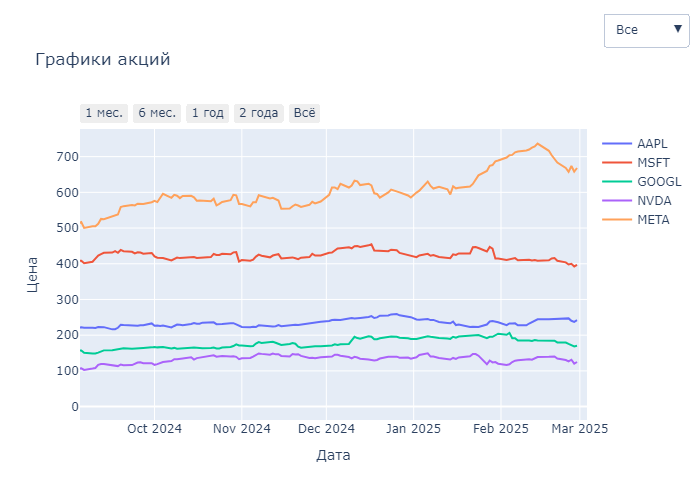

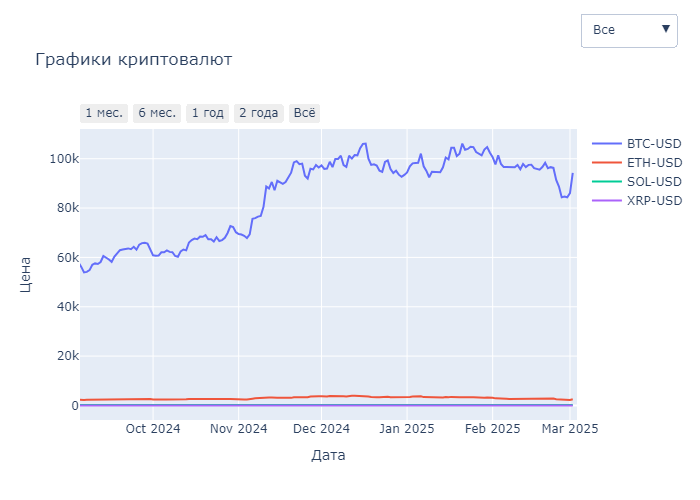

In [10]:
#По умолчанию показываю графики за последние 6 мес

def draw_prices_timeline(func_list, title):
    
    # Добавление линий для каждой акции/крипты
    for ticker in func_list:
        fig.add_trace(go.Scatter(x=df[df['tic']==ticker]['Date'], y=df[df['tic']==ticker]['Close'], name=ticker, visible=True))
    
    # Создание кнопок для переключения графиков
    buttons = []
    
    # Добавление кнопки для отображения всех графиков
    buttons.append(dict(
        label="Все",
        method="update",
        args=[{"visible": [True] * len(tickers)}]
    ))
    
    # Добавление кнопок для отображения отдельных графиков
    for i, ticker in enumerate(func_list):
        visibility = [False] * len(func_list)
        visibility[i] = True
        buttons.append(dict(
            label=ticker,
            method="update",
            args=[{"visible": visibility}]
        ))
    
    # Добавление кнопок на график
    fig.update_layout(
        updatemenus=[
            dict(
                type="dropdown",
                direction="down",
                x=1.2,
                y=1.4,
                showactive=True,
                buttons=buttons
            )
        ],
        title=title,
        xaxis_title="Дата",
        yaxis_title="Цена",
    )
#Отдельно сделала функцию для отображения текущего периода, у меня он 6 месяцев    
def six_month():    
    fig.update_yaxes(autorange=True)
    # Вычисление даты 6 месяцев назад
    six_months_ago = datetime.today() - timedelta(days=180)
    # Настройка оси X для отображения последних 6 месяцев по умолчанию
    fig.update_xaxes(
        range=[six_months_ago, datetime.today()],  # Диапазон по умолчанию
    #    rangeslider_visible=True,  # Добавление ползунка
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1 мес.", step="month", stepmode="backward"),
                dict(count=6, label="6 мес.", step="month", stepmode="backward"),
                dict(count=1, label="1 год", step="year", stepmode="backward"),
                dict(count=2, label="2 года", step="year", stepmode="backward"),
                dict(step="all", label="Всё")
            ])
        )
    )


# Создание графиков акций
fig = go.Figure()
draw_prices_timeline(stock_list, 'Графики акций')
six_month()
fig.show("png")
# Создание графиков криптовалют
fig = go.Figure()
draw_prices_timeline(crypt_list, 'Графики криптовалют')
six_month()
fig.show("png")

### Посмотрим наличие в данных значений NaN и количество ненулевых значений

In [11]:
df.isna().sum()

Price
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
tic          0
type         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16292 entries, 0 to 16291
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16292 non-null  object 
 1   Adj Close  16292 non-null  float64
 2   Close      16292 non-null  float64
 3   High       16292 non-null  float64
 4   Low        16292 non-null  float64
 5   Open       16292 non-null  float64
 6   Volume     16292 non-null  int64  
 7   tic        16292 non-null  object 
 8   type       16292 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [13]:
print(df.describe(include='all'))

Price         Date      Adj Close          Close           High  \
count        16292   16292.000000   16292.000000   16292.000000   
unique        2253            NaN            NaN            NaN   
top     2023-06-23            NaN            NaN            NaN   
freq             9            NaN            NaN            NaN   
mean           NaN    4928.896861    4929.750479    5032.043942   
std            NaN   14537.505857   14537.229172   14834.934386   
min            NaN       0.139635       0.139635       0.146911   
25%            NaN      29.401422      29.447000      30.579500   
50%            NaN     156.525558     158.077408     161.385155   
75%            NaN     464.883682     466.394997     472.587509   
max            NaN  106146.265625  106146.265625  109114.882812   

Price             Low           Open        Volume      tic   type  
count    16292.000000   16292.000000  1.629200e+04    16292  16292  
unique            NaN            NaN           NaN       

Отлично, пропусков нет и нулевых значений тоже

### Посмотрим на наличие выбросов

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

**Построим график распределения и посмотрим, является ли распредение цен нормальным.**

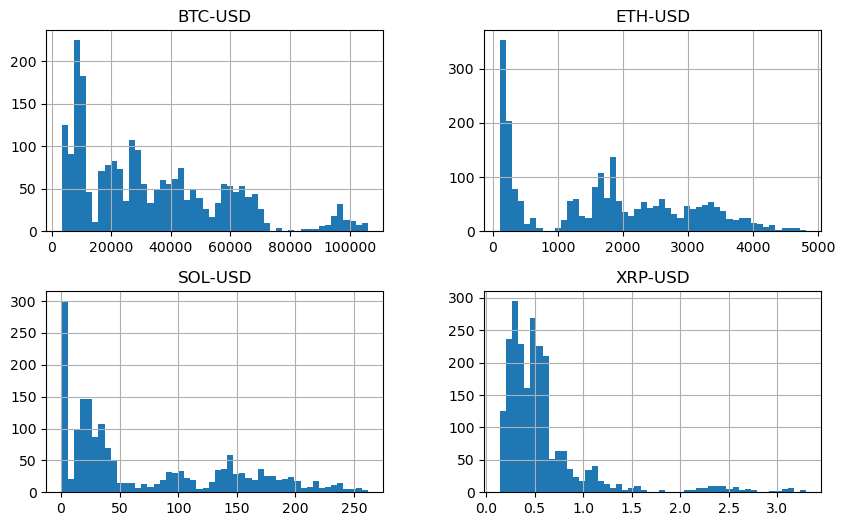

In [15]:
#df = df[df['Date']>='2020-01-01']
pd.DataFrame(df[df['tic']==ticker].set_index('Date', inplace=False)['Close'].rename(ticker) for ticker in crypt_list).T.hist(bins = 50, figsize=(10, 6))
plt.show()

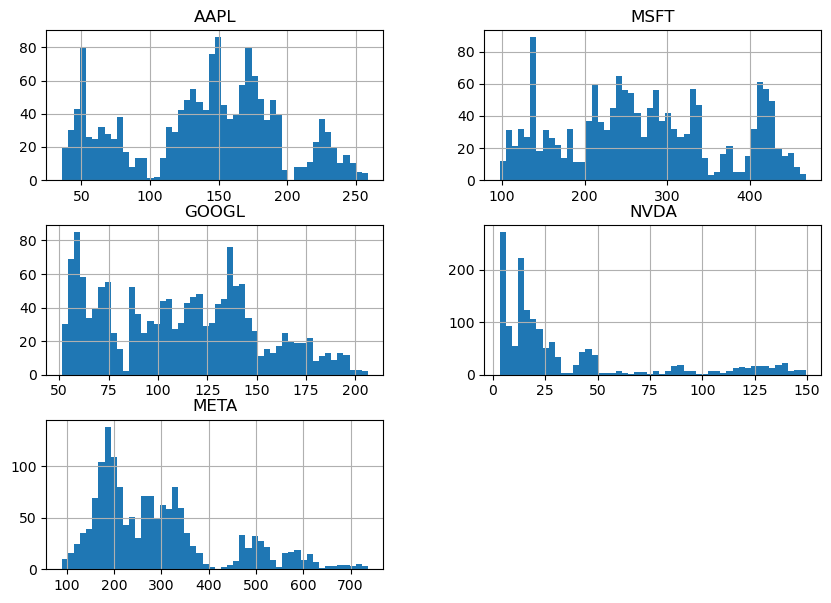

In [16]:
pd.DataFrame(df[df['tic']==ticker].set_index('Date', inplace=False)['Close'].rename(ticker) for ticker in stock_list).T.hist(bins = 50, figsize=(10, 7))
plt.show()

Распределения не являются нормальными, попробуем использовать межквартильный размах для поиска аномалий в ценах закрытия

In [17]:
def iqr(ticker, col, ratio):
    # Расчет IQR для цен закрытия
    close_prices = df[df['tic']==ticker][col]
    
    # Вычисление квартилей
    Q1 = close_prices.quantile(0.25)  # Первый квартиль (25-й процентиль)
    
    Q3 = close_prices.quantile(0.75)  # Третий квартиль (75-й процентиль)
    IQR = Q3 - Q1  # Межквартильный размах
    
    # Границы для выбросов
    lower_bound = Q1 - ratio * IQR
    upper_bound = Q3 + ratio * IQR
    
    # Вывод результатов
    
    # Поиск выбросов
    outliers = close_prices[(close_prices < lower_bound) | (close_prices > upper_bound)]
    
    return Q1, Q3, IQR, lower_bound, upper_bound, len(outliers)
k = 0
for ticker in tickers:
    Q1, Q3, IQR, lower_bound, upper_bound, count_out = iqr(ticker, 'Close', 1.5)
    
    if k==0:
        print('Акция/Крипта\tQ1(25%)\t\tQ3(75%)\t\tIQR\t\tНижняя граница\t\tВерхняя граница\t\tНайдено выбросов')
    elif ticker in stock_list:
        print(f"{ticker}\t\t{Q1:.2f}\t\t{Q3:.2f}\t\t{IQR:.2f}\t\t\t{lower_bound:.2f}\t\t\t{upper_bound:.2f}\t\t\t{count_out}")
    else:
        print(f"{ticker}\t\t{Q1:.0f}\t\t{Q3:.0f}\t\t{IQR:.0f}\t\t\t{lower_bound:.0f}\t\t\t{upper_bound:.0f}\t\t\t{count_out}")
    k = +1


Акция/Крипта	Q1(25%)		Q3(75%)		IQR		Нижняя граница		Верхняя граница		Найдено выбросов
MSFT		202.91		335.02		132.11			4.75			533.18			0
GOOGL		74.19		138.84		64.65			-22.78			235.81			0
NVDA		10.22		43.51		33.29			-39.72			93.44			199
META		188.14		339.39		151.25			-38.74			566.27			98
BTC-USD		10763		48176		37413			-45356			104296			9
ETH-USD		308		2676		2368			-3244			6228			0
SOL-USD		18		138		120			-161			318			0
XRP-USD		0		1		0			-0			1			211


Выбросы есть, но поскольку цены некоторых акций и криптовалют имели сильный рост, то неправильно сравнивать цены в абсолюте. Считаю, что нужно рассматривать выбросы на основе отношения разности текущей цены закрытия относительно цены закрытия предыдущего дня.

In [18]:
# Добавляем столбец с отношением цены закрытия текущего дня и предыдущего
df['pr_close'] = df.groupby('tic')['Close'].transform(lambda x: (x - x.shift(1))/x*100)

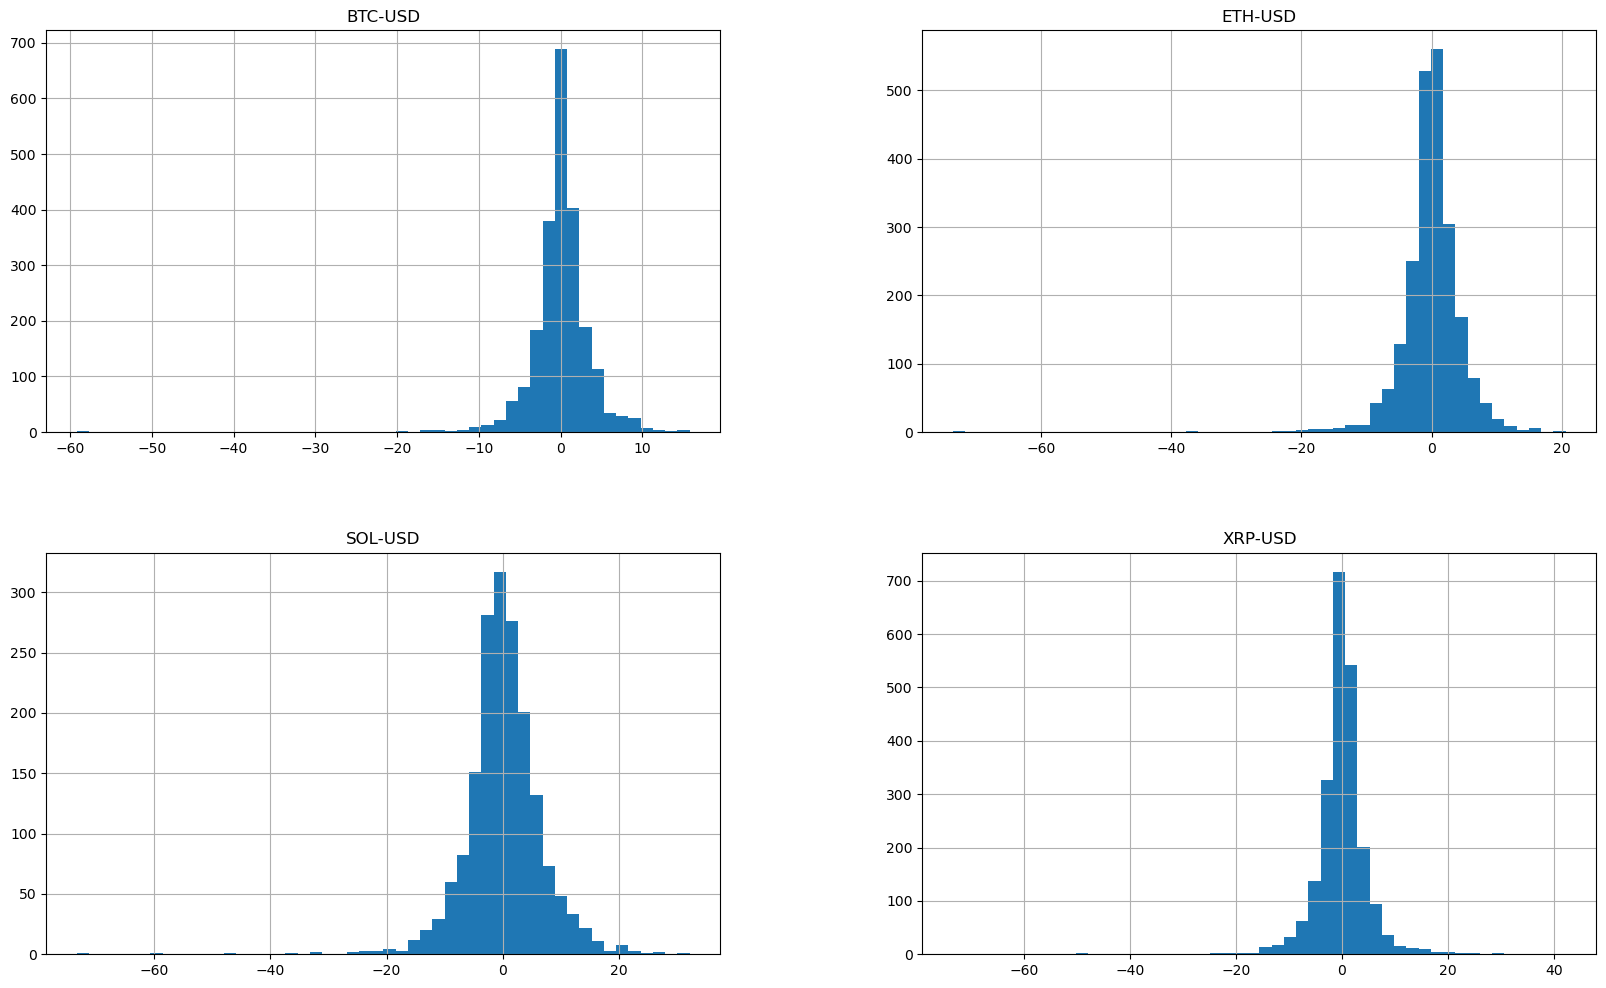

In [19]:
pd.DataFrame(df[df['tic']==ticker].set_index('Date', inplace=False)['pr_close'].rename(ticker) for ticker in crypt_list).T.hist(bins = 50, figsize=(20, 12))
plt.show()

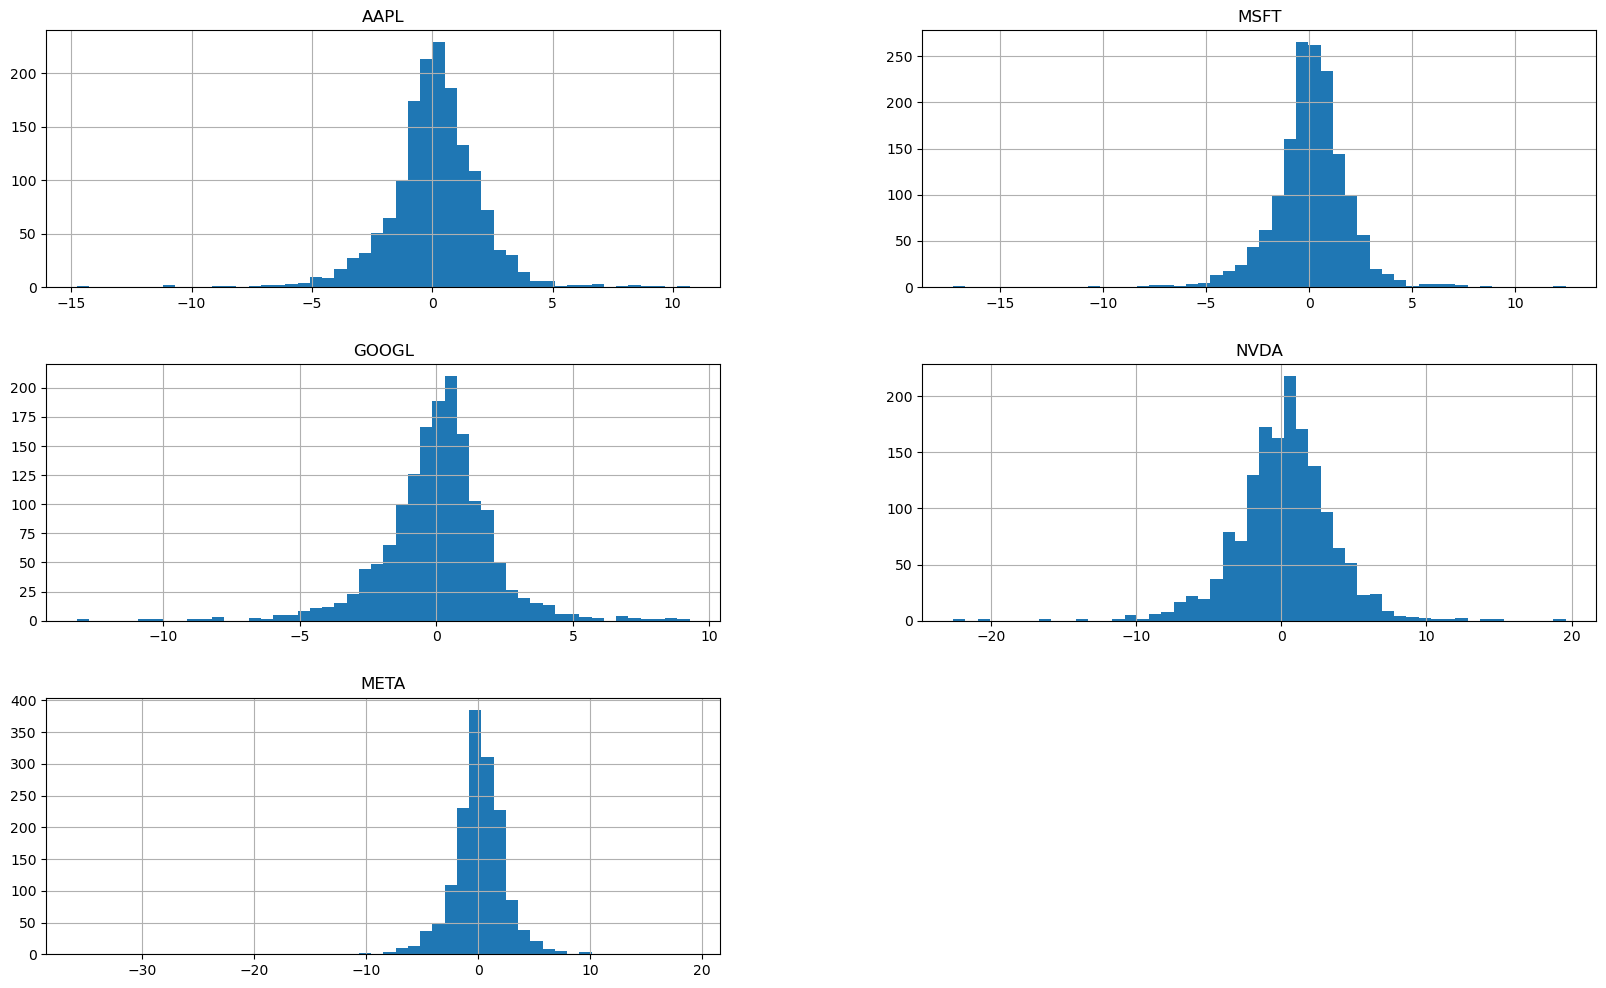

In [20]:
pd.DataFrame(df[df['tic']==ticker].set_index('Date', inplace=False)['pr_close'].rename(ticker) for ticker in stock_list).T.hist(bins = 50, figsize=(20, 12))
plt.show()

Распределения визуально кажутся нормальными, но с небольшим присутствием выбросов. Найдем их

In [21]:
#Посмотрим на распределения с точки зрения теста Гаусса
df = df.dropna()
for ticker in tickers:
    stat, p = stats.normaltest(np.log(df[df['tic']==ticker]['pr_close']+100))
    print(ticker)
    print(f'stat={stat}, p={p}')
    
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

AAPL
stat=323.16239439884407, p=6.7015872622659325e-71
Probably not Gaussian
MSFT
stat=447.75662686436306, p=5.900432664770913e-98
Probably not Gaussian
GOOGL
stat=261.877155506764, p=1.3617526009408597e-57
Probably not Gaussian
NVDA
stat=289.293912915402, p=1.51574095850875e-63
Probably not Gaussian
META
stat=1500.2916843474086, p=0.0
Probably not Gaussian
BTC-USD
stat=2853.38918322609, p=0.0
Probably not Gaussian
ETH-USD
stat=3332.963726686122, p=0.0
Probably not Gaussian
SOL-USD
stat=1829.2907982939282, p=0.0
Probably not Gaussian
XRP-USD
stat=2838.064938851893, p=0.0
Probably not Gaussian


In [22]:
# А теперь с точки зрения Шарипо
from scipy.stats import shapiro
for ticker in tickers:
    # Проведение теста Шапиро-Уилка
    stat, p = shapiro(df[df['tic']==ticker]['pr_close'])
    print(ticker)
    print(f"Статистика: {stat}, p-значение: {p}")
    
    # Интерпретация результата
    alpha = 0.05
    if p > alpha:
        print("Не отвергаем нулевую гипотезу: распределение нормальное")
    else:
        print("Отвергаем нулевую гипотезу: распределение не нормальное")

AAPL
Статистика: 0.9373427646946331, p-значение: 4.960408749192516e-25
Отвергаем нулевую гипотезу: распределение не нормальное
MSFT
Статистика: 0.9292921701433923, p-значение: 2.018050435715542e-26
Отвергаем нулевую гипотезу: распределение не нормальное
GOOGL
Статистика: 0.9447926921204444, p-значение: 1.2851756793029586e-23
Отвергаем нулевую гипотезу: распределение не нормальное
NVDA
Статистика: 0.962242692875968, p-значение: 1.2261057789558767e-19
Отвергаем нулевую гипотезу: распределение не нормальное
META
Статистика: 0.8213181495849968, p-значение: 2.046821440242402e-38
Отвергаем нулевую гипотезу: распределение не нормальное
BTC-USD
Статистика: 0.863330063624554, p-значение: 1.629058576577728e-40
Отвергаем нулевую гипотезу: распределение не нормальное
ETH-USD
Статистика: 0.8643129908944549, p-значение: 2.083370504695136e-40
Отвергаем нулевую гипотезу: распределение не нормальное
SOL-USD
Статистика: 0.9043236099552092, p-значение: 4.667546081052562e-32
Отвергаем нулевую гипотезу: ра

**Тесты показали, что распределения на основе разности цен текущего и предыдущего дня не являются нормальными.
Найдем выбросы для для этих данных.
Чтобы определить, является ли точка выбросом, посмотрим на персентиль объема в этот день. Если он низкий (< 50%), то эту точку будем считать выбросом и в дальнейшем отрисуем ее.**

In [23]:
df['Lower_bound'] = False
df['Upper_bound'] = False
print('Акция/Крипта\tQ1(25%)\t\tQ3(75%)\t\tIQR\tНижняя граница\tВерхняя граница\t\tНайдено выбросов\tИз них с низким объемом')
for ticker in tickers:
    #Находим персентиль объема торгов для каждого дня
    df.loc[(df['tic']==ticker),'Volume_perc'] = df.loc[(df['tic']==ticker),'Volume'].rank(pct=True)

    #Посчитаем квантили и границы.
    Q1, Q3, IQR, lower_bound, upper_bound, count_out = iqr(ticker, 'pr_close', 1.5)
    
    volume_outliers = df.loc[(df['tic']==ticker)&((df['pr_close']>upper_bound)|(df['pr_close']<lower_bound))&(df.loc[(df['tic']==ticker),'Volume_perc'] < 0.5)]

    df.loc[(df['tic']==ticker)&(df['pr_close']<lower_bound)& (df['Volume_perc'] < 0.5),'Lower_bound'] = True
    df.loc[(df['tic']==ticker)&(df['pr_close']>upper_bound)& (df['Volume_perc'] < 0.5),'Upper_bound'] = True
        
    if ticker in stock_list:
        print(f"{ticker}\t\t{Q1:.2f}\t\t{Q3:.2f}\t\t{IQR:.2f}\t\t{lower_bound:.2f}\t\t{upper_bound:.2f}\t\t\t{count_out}\t\t\t{len(volume_outliers)}")
    else:
        print(f"{ticker}\t\t{Q1:.0f}\t\t{Q3:.0f}\t\t{IQR:.0f}\t\t{lower_bound:.0f}\t\t{upper_bound:.0f}\t\t\t{count_out}\t\t\t{len(volume_outliers)}")



Акция/Крипта	Q1(25%)		Q3(75%)		IQR	Нижняя граница	Верхняя граница		Найдено выбросов	Из них с низким объемом
AAPL		-0.80		1.18		1.97		-3.76		4.14			69			2
MSFT		-0.78		1.05		1.82		-3.51		3.78			75			1
GOOGL		-0.86		1.07		1.94		-3.76		3.98			90			0
NVDA		-1.57		2.09		3.66		-7.06		7.58			52			2
META		-1.10		1.38		2.49		-4.83		5.11			70			1
BTC-USD		-1		2		3		-6		6			181			22
ETH-USD		-2		2		4		-8		8			154			25
SOL-USD		-3		3		7		-13		13			86			47
XRP-USD		-2		2		4		-8		8			195			11


In [24]:
# Добавляем маркеры для выбросов, чтобы отобразить их в графиках
def draw_outliers(func_list):
    for ticker in func_list:
        lower_outliers = df.loc[(df['tic'] == ticker)&(df['Lower_bound'] == True)]
        fig.add_trace(go.Scatter(
                                    x = lower_outliers['Date'],
                                    y = lower_outliers['Close'],
                                    mode='markers',
                                    marker=dict(color='red', size=10),
                                    name='Выбросы ' + ticker
                                ))
    for ticker in func_list:
        upper_outliers = df.loc[(df['tic']==ticker)&(df['Upper_bound'] == True)]
        fig.add_trace(go.Scatter(
                                    x = upper_outliers['Date'],
                                    y = upper_outliers['Close'],
                                    mode='markers',
                                    marker=dict(color='yellow', size=10),
                                    name='Выбросы ' + ticker
                                ))




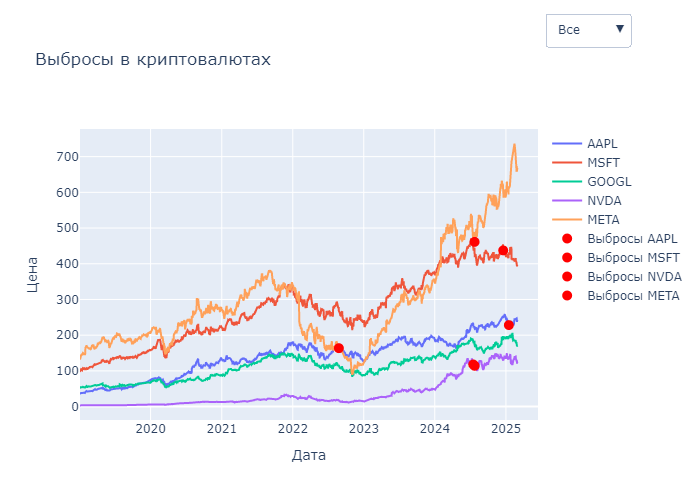

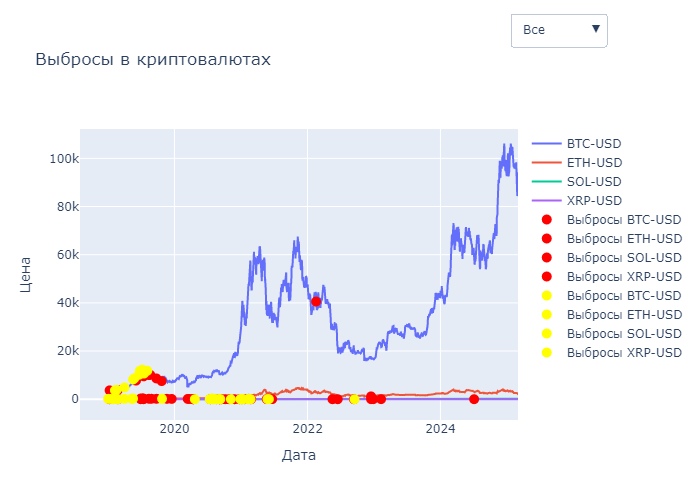

In [27]:
fig = go.Figure()  
draw_prices_timeline(stock_list, 'Выбросы в криптовалютах')
draw_outliers(stock_list)
fig.show("png")

fig = go.Figure()  
draw_prices_timeline(crypt_list, 'Выбросы в криптовалютах')
draw_outliers(crypt_list)
fig.show("png")


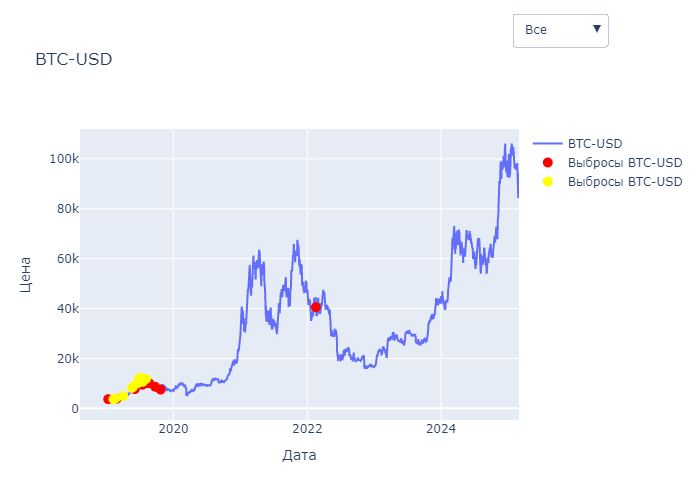

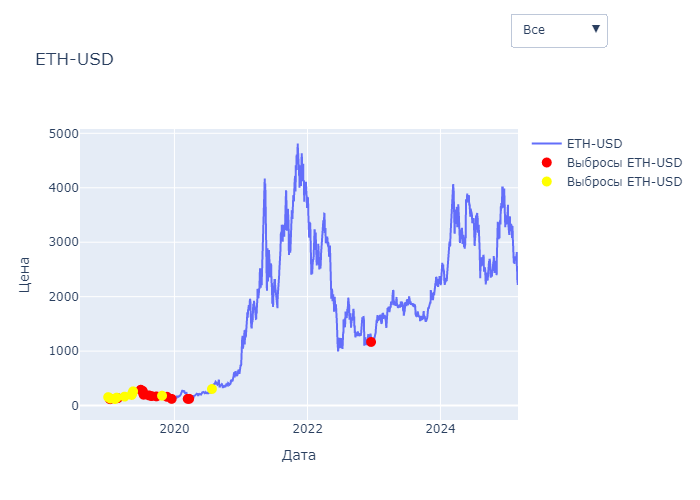

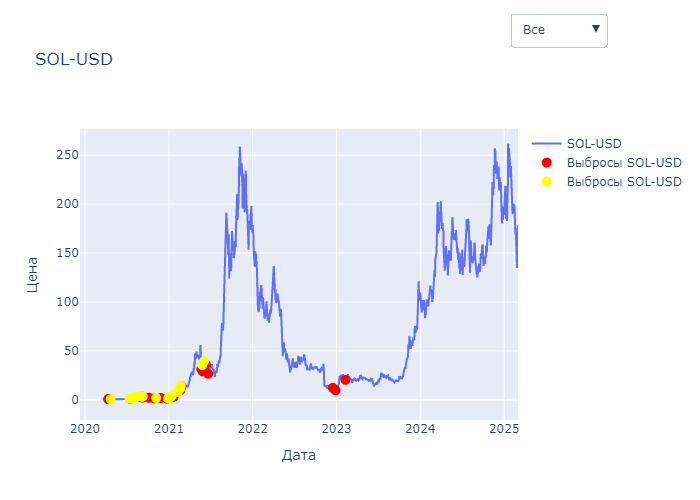

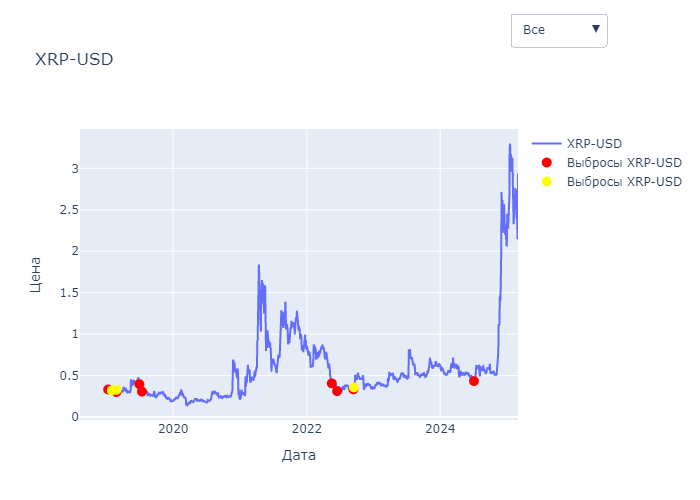

In [28]:
for ticker in crypt_list:
    fig = go.Figure()
    draw_prices_timeline([ticker], ticker)
    draw_outliers([ticker])
    fig.show("png")

Вывод: Выбросы в криптовалюте объясняются не очень большим объемом торгов в исторических данных, поэтому любой пришедший игрок с хорошим портфелем мог вызвать аномалию. В акциях всего 6 точек, которые выявились как выбросы. Особых новостей в эти дни нет, с учетом относительно небольших объемов торгов. В следующих шагах эти выбросы можно заменить на среднее значение в локальном интервале и на этих данных считать технические индикаторы.